In [1]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kalpe\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    scikit-surprise-1.1.1      |   py38h1e00858_1         567 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.6 MB

The following NEW packages will be INSTALLED:

  scikit-surprise    conda-forge/win-64::scikit-surprise-1.1.1-py38h1e00858_1

The following packages will be UPDATED:

  conda                               4.10.0-py38haa244fe_1 --> 4.10.3-py38haa244fe_0




scikit-surprise-1.1. | 567 KB    |            |   0% 
scikit-surprise-1.1. | 567 KB    | 2          |   3% 
scikit-surprise-1.1. | 567 KB    | ####5    

In [4]:
!pip install mlxtend

You should consider upgrading via the 'c:\users\kalpe\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
%matplotlib inline

from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import seaborn as sns

In [2]:
catalog_df=pd.read_csv("CatalogCrossSell(1).csv")
catalog_df.head(20)

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,11569.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13714.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46391.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67264.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67363.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,72553.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,79814.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,80903.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,91439.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,96701.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
catalog_df.tail(20)

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
59984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
catalog_df.shape

(60004, 20)

In [5]:
catalog_df.columns

Index(['Customer Number', 'Clothing Division', 'Housewares Division',
       'Health Products Division', 'Automotive Division',
       'Personal Electronics Division', 'Computers Division',
       'Garden Division', 'Novelty Gift Division', 'Jewelry Division',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [6]:
#drop irrelevant columns 
catalog_df.drop(columns =['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'], inplace = True)

In [7]:
#check missing values
catalog_df.isnull().sum()

Customer Number                  55006
Clothing Division                55006
Housewares Division              55006
Health Products Division         55006
Automotive Division              55006
Personal Electronics Division    55006
Computers Division               55006
Garden Division                  55006
Novelty Gift Division            55006
Jewelry Division                 55006
dtype: int64

In [8]:
#Drop missing values
catalog_df.dropna(inplace = True)

In [9]:

catalog_df.isnull().sum()

Customer Number                  0
Clothing Division                0
Housewares Division              0
Health Products Division         0
Automotive Division              0
Personal Electronics Division    0
Computers Division               0
Garden Division                  0
Novelty Gift Division            0
Jewelry Division                 0
dtype: int64

In [10]:
#check shape after removing missing values
catalog_df.shape

(4998, 10)

In [56]:
catalog_df.head(20)

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
0,11569.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,13714.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,46391.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,67264.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
4,67363.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5,72553.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
6,79814.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7,80903.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,91439.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
9,96701.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


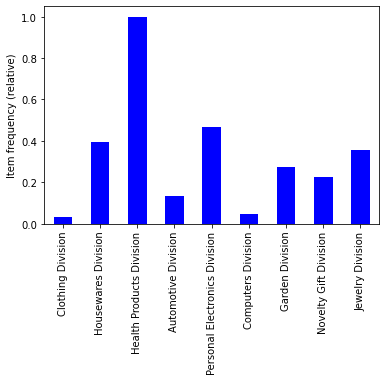

In [51]:
#Check the histogram

df=catalog_df.drop(columns= ['Customer Number', 'Catalogs Bought'])
itemFrequency = df.sum(axis=0) / len(df)

ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [44]:
# Create a new column that has total of catalogs bought by each customer
catalog_df['Catalogs Bought']=catalog_df.iloc[:,1:].sum(axis=1)
catalog_df.head(5)

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division,Catalogs Bought
0,11569.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0
1,13714.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0
2,46391.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0
3,67264.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,5.0
4,67363.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0


In [45]:
catalog_df['Catalogs Bought'].value_counts()

2.0    1358
3.0    1022
1.0    1002
4.0     759
5.0     464
6.0     264
7.0     106
8.0      18
9.0       5
Name: Catalogs Bought, dtype: int64

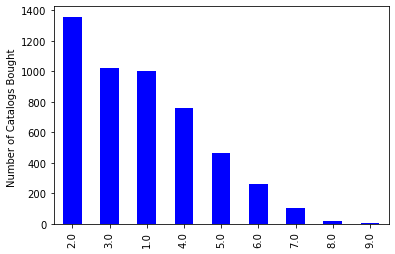

In [47]:
ax = catalog_df['Catalogs Bought'].value_counts().plot.bar(color='blue')
plt.ylabel('Number of Catalogs Bought ')
plt.show()

In [49]:
corrMatrix =df.corr().round(2)
corrMatrix

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
Clothing Division,1.00,0.13,NaN,0.03,0.05,0.14,0.03,0.07,0.10
Housewares Division,0.13,1.00,NaN,0.09,0.21,0.13,0.12,0.22,0.23
Health Products Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Automotive Division,0.03,0.09,NaN,1.00,0.12,0.05,0.32,0.17,0.17
Personal Electronics Division,0.05,0.21,NaN,0.12,1.00,0.01,0.16,0.30,0.13
Computers Division,0.14,0.13,NaN,0.05,0.01,1.00,0.04,0.04,0.13
Garden Division,0.03,0.12,NaN,0.32,0.16,0.04,1.00,0.27,0.14
Novelty Gift Division,0.07,0.22,NaN,0.17,0.30,0.04,0.27,1.00,0.13
Jewelry Division,0.10,0.23,NaN,0.17,0.13,0.13,0.14,0.13,1.00


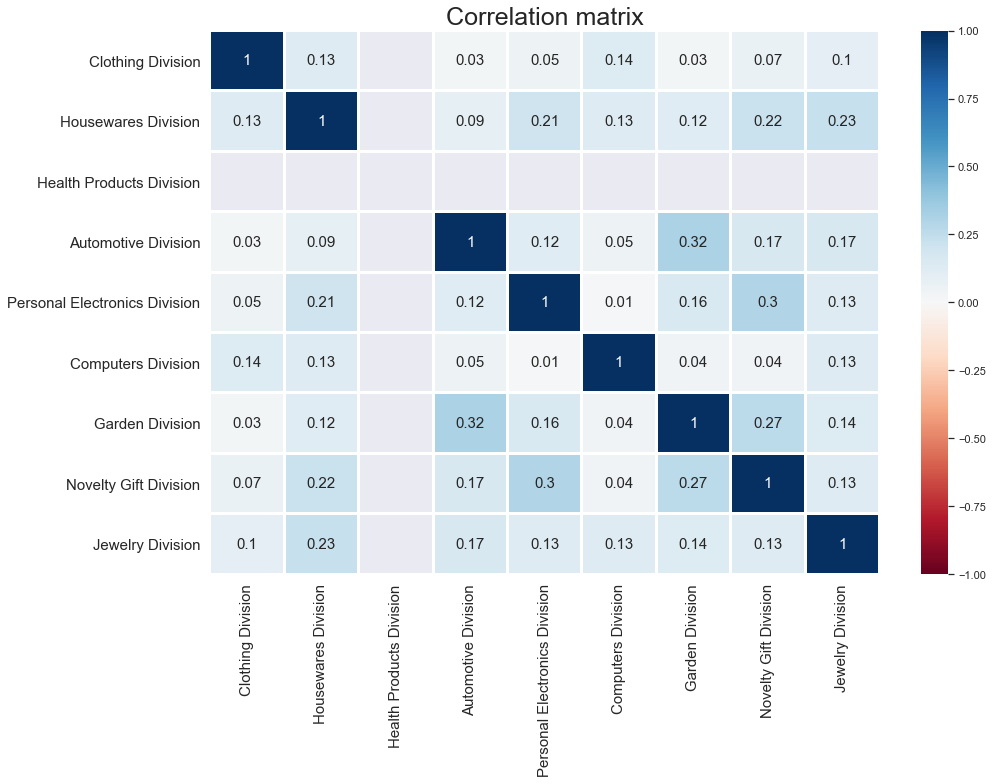

In [52]:
#Correlation table & Heatmap
sns.set(font_scale=0.1)
sns.set(rc={'figure.figsize':(15,10)})
r=sns.heatmap(corrMatrix, annot=True, linewidth = 2, cmap='RdBu',square=False, vmin = -1, vmax = 1,annot_kws={'size': 15})
plt.title('Correlation matrix', fontsize=25)
r.set_xticklabels(r.get_xmajorticklabels(), fontsize = 15)
r.set_yticklabels(r.get_ymajorticklabels(), fontsize = 15)

plt.show()

#### No strong correlation
If we wanted to make a guess for itemset combinations, correlation is no help here.

# Association Rule Analysis

In [52]:
# create frequent itemsets and rules
itemsets = apriori(df, min_support=0.04, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

print('Number of rules', len(rules))

# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)


print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))

Number of rules 255
                                           antecedents  \
174  (Novelty Gift Division, Health Products Divisi...   
177       (Novelty Gift Division, Automotive Division)   
81        (Novelty Gift Division, Automotive Division)   
251  (Garden Division, Jewelry Division, Personal E...   
246  (Health Products Division, Jewelry Division, P...   
209  (Jewelry Division, Personal Electronics Divisi...   
216  (Housewares Division, Personal Electronics Div...   
210  (Housewares Division, Health Products Division...   
146  (Housewares Division, Personal Electronics Div...   
76   (Automotive Division, Personal Electronics Div...   
159  (Health Products Division, Automotive Division...   
162  (Automotive Division, Personal Electronics Div...   
236          (Novelty Gift Division, Jewelry Division)   
154          (Novelty Gift Division, Jewelry Division)   
232  (Novelty Gift Division, Health Products Divisi...   
102         (Housewares Division, Automotive Divisio

In [53]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) == 1 for c in rules.consequents]]

rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(10)

,antecedents,consequents,support,confidence,lift,leverage
81,"(Novelty Gift Division, Automotive Division)",(Garden Division),0.044018,0.791367,2.908273,0.028882
76,"(Automotive Division, Personal Electronics Div...",(Garden Division),0.058023,0.698795,2.568072,0.035429
35,"(Housewares Division, Automotive Division)",(Garden Division),0.045418,0.671598,2.468121,0.027016
83,"(Jewelry Division, Automotive Division)",(Garden Division),0.048619,0.646277,2.375066,0.028149
78,"(Automotive Division, Personal Electronics Div...",(Novelty Gift Division),0.044418,0.534940,2.351477,0.025528
87,"(Garden Division, Personal Electronics Division)",(Novelty Gift Division),0.087235,0.534314,2.348725,0.050094
13,(Automotive Division),(Garden Division),0.085434,0.633531,2.328227,0.048739
56,"(Health Products Division, Automotive Division)",(Garden Division),0.085434,0.633531,2.328227,0.048739
48,"(Housewares Division, Garden Division)",(Novelty Gift Division),0.068828,0.518072,2.277331,0.038605
82,"(Garden Division, Automotive Division)",(Novelty Gift Division),0.044018,0.515222,2.264804,0.024582


In [54]:
rules.shape

(83, 9)

In [71]:
rules['lift'].describe()

count    83.000000
mean      1.495329
std       0.447402
min       1.000000
25%       1.000000
50%       1.476831
75%       1.677369
max       2.908273
Name: lift, dtype: float64

* Total 83 sets with confidence above 0.5
* 3rd Quartile values above 1.67 of lift.
* These would have a higher chance of purchase.
* Values with lift more than 2 have twice the chance of purchase compared to randomly selected sets.

In [72]:
rules[rules.lift > 1.67].shape

(21, 9)

* Total 21 sets in 3rd quartile

In [73]:
#Looking at 3rd quartile values of lift
rules[(rules.lift > 1.67) & (rules.lift <2) ].sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction'])

,antecedents,consequents,support,confidence,lift,leverage
37,"(Housewares Division, Automotive Division)",(Jewelry Division),0.045818,0.677515,1.898105,0.021679
86,"(Novelty Gift Division, Personal Electronics D...",(Garden Division),0.087235,0.515976,1.896213,0.041230
46,"(Novelty Gift Division, Housewares Division)",(Garden Division),0.068828,0.510386,1.875668,0.032133
52,"(Novelty Gift Division, Jewelry Division)",(Housewares Division),0.075430,0.703358,1.787181,0.033224
80,"(Automotive Division, Personal Electronics Div...",(Jewelry Division),0.051621,0.621687,1.741699,0.021983
90,"(Novelty Gift Division, Jewelry Division)",(Personal Electronics Division),0.085834,0.800373,1.712442,0.035710
41,"(Novelty Gift Division, Housewares Division)",(Personal Electronics Division),0.107843,0.799703,1.711009,0.044814
77,"(Novelty Gift Division, Automotive Division)",(Personal Electronics Division),0.044418,0.798561,1.708565,0.018421
45,"(Jewelry Division, Personal Electronics Division)",(Housewares Division),0.132053,0.668693,1.699099,0.054333
49,"(Housewares Division, Garden Division)",(Jewelry Division),0.080232,0.603916,1.691912,0.032811


In [57]:
rules[rules.lift > 2].shape

(11, 9)

Selecting sets with lift more than 2 for a higher chance of purchase and therefore a higher ROI from promotion.

In [74]:
# looking at lift more tha 2 for higher chance of purchase.
rules[rules.lift > 2].sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction'])

,antecedents,consequents,support,confidence,lift,leverage
81,"(Novelty Gift Division, Automotive Division)",(Garden Division),0.044018,0.791367,2.908273,0.028882
76,"(Automotive Division, Personal Electronics Div...",(Garden Division),0.058023,0.698795,2.568072,0.035429
35,"(Housewares Division, Automotive Division)",(Garden Division),0.045418,0.671598,2.468121,0.027016
83,"(Jewelry Division, Automotive Division)",(Garden Division),0.048619,0.646277,2.375066,0.028149
78,"(Automotive Division, Personal Electronics Div...",(Novelty Gift Division),0.044418,0.534940,2.351477,0.025528
87,"(Garden Division, Personal Electronics Division)",(Novelty Gift Division),0.087235,0.534314,2.348725,0.050094
13,(Automotive Division),(Garden Division),0.085434,0.633531,2.328227,0.048739
56,"(Health Products Division, Automotive Division)",(Garden Division),0.085434,0.633531,2.328227,0.048739
48,"(Housewares Division, Garden Division)",(Novelty Gift Division),0.068828,0.518072,2.277331,0.038605
82,"(Garden Division, Automotive Division)",(Novelty Gift Division),0.044018,0.515222,2.264804,0.024582


* Values in 3rd quartile but less than lift of 2.
* still have a high chance of purchase but can be given a higher discount to increase the chance even more.